# APLICACIÓN DEL MODELO DE MACHINE LEARNING

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CARGAR Y PREPROCESAR DATOS

In [23]:
# Cargar datos
df = pd.read_csv('./soja-serie-1941-2023.csv', encoding='utf-8')

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Convertir a tipos numéricos
cols_num = ['anio','provincia_id','departamento_id','superficie_sembrada_ha',
            'superficie_cosechada_ha','produccion_tm','rendimiento_kgxha']

for c in cols_num:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# ANÁLISIS INICIAL Y ESTADÍSTICAS DESCRIPTIVAS

In [24]:
print("INFORMACIÓN DEL DATASET ORIGINAL")
df.info()

INFORMACIÓN DEL DATASET ORIGINAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12315 entries, 0 to 12314
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cultivo_nombre           12315 non-null  object
 1   anio                     12315 non-null  int64 
 2   campania                 12315 non-null  object
 3   provincia_nombre         12315 non-null  object
 4   provincia_id             12315 non-null  int64 
 5   departamento_nombre      12315 non-null  object
 6   departamento_id          12315 non-null  int64 
 7   superficie_sembrada_ha   12315 non-null  int64 
 8   superficie_cosechada_ha  12315 non-null  int64 
 9   produccion_tm            12315 non-null  int64 
 10  rendimiento_kgxha        12315 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [25]:
print("\nESTADÍSTICAS DESCRIPTIVAS")
print(df.describe().T)


ESTADÍSTICAS DESCRIPTIVAS
                           count           mean            std     min  \
anio                     12315.0    1997.465936      17.538316  1941.0   
provincia_id             12315.0      33.771336      30.222514     6.0   
departamento_id          12315.0   33970.578806   30105.604271  6007.0   
superficie_sembrada_ha   12315.0   41067.252781   80890.866663     0.0   
superficie_cosechada_ha  12315.0   39860.312302   79329.907007     0.0   
produccion_tm            12315.0  103229.241981  231429.962928     0.0   
rendimiento_kgxha        12315.0    2006.050670     823.995203     0.0   

                            25%      50%      75%        max  
anio                     1984.0   2000.0   2012.0     2023.0  
provincia_id                6.0     22.0     54.0       90.0  
departamento_id          6651.0  22049.0  54112.0    90119.0  
superficie_sembrada_ha    653.0   7000.0  45050.0   894613.0  
superficie_cosechada_ha   600.0   6300.0  43000.0   883613.0  
pr

#  MANEJO DE OUTLIERS EN RENDIMIENTO

In [26]:
print("\nVALORES FALTANTES POR COLUMNA")
print(df.isnull().sum())


VALORES FALTANTES POR COLUMNA
cultivo_nombre             0
anio                       0
campania                   0
provincia_nombre           0
provincia_id               0
departamento_nombre        0
departamento_id            0
superficie_sembrada_ha     0
superficie_cosechada_ha    0
produccion_tm              0
rendimiento_kgxha          0
dtype: int64


Dataset original: 12315 filas
Dataset sin outliers: 12253 filas
Outliers eliminados: 62 filas


C:\Users\briia\AppData\Local\Temp\ipykernel_13928\1765538892.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='Estado', y='rendimiento_kgxha', palette='viridis')


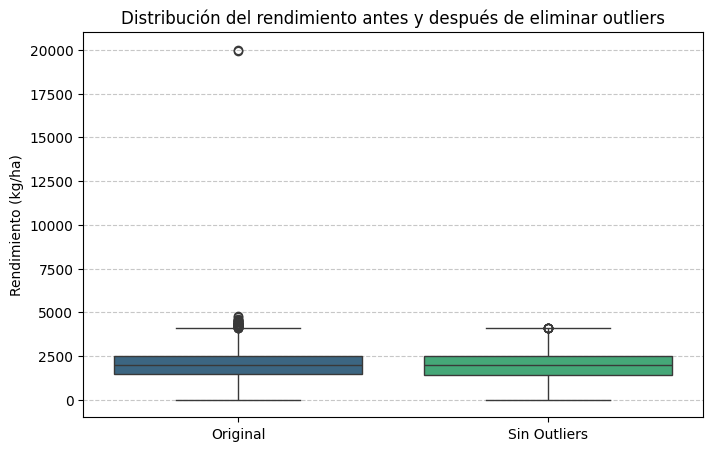

In [27]:
Q1 = df['rendimiento_kgxha'].quantile(0.25)
Q3 = df['rendimiento_kgxha'].quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

df_sin_outliers = df[(df['rendimiento_kgxha'] >= limite_inf) & 
                     (df['rendimiento_kgxha'] <= limite_sup)]

print(f"Dataset original: {len(df)} filas")
print(f"Dataset sin outliers: {len(df_sin_outliers)} filas")
print(f"Outliers eliminados: {len(df) - len(df_sin_outliers)} filas")

df_box = pd.DataFrame({
    'rendimiento_kgxha': pd.concat([
        df['rendimiento_kgxha'], 
        df_sin_outliers['rendimiento_kgxha']
    ], ignore_index=True),
    'Estado': ['Original'] * len(df) + ['Sin Outliers'] * len(df_sin_outliers)
})

# --- Gráfico de caja ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_box, x='Estado', y='rendimiento_kgxha', palette='viridis')
plt.title('Distribución del rendimiento antes y después de eliminar outliers')
plt.xlabel('')
plt.ylabel('Rendimiento (kg/ha)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ANÁLISIS DE CORRELACIÓN

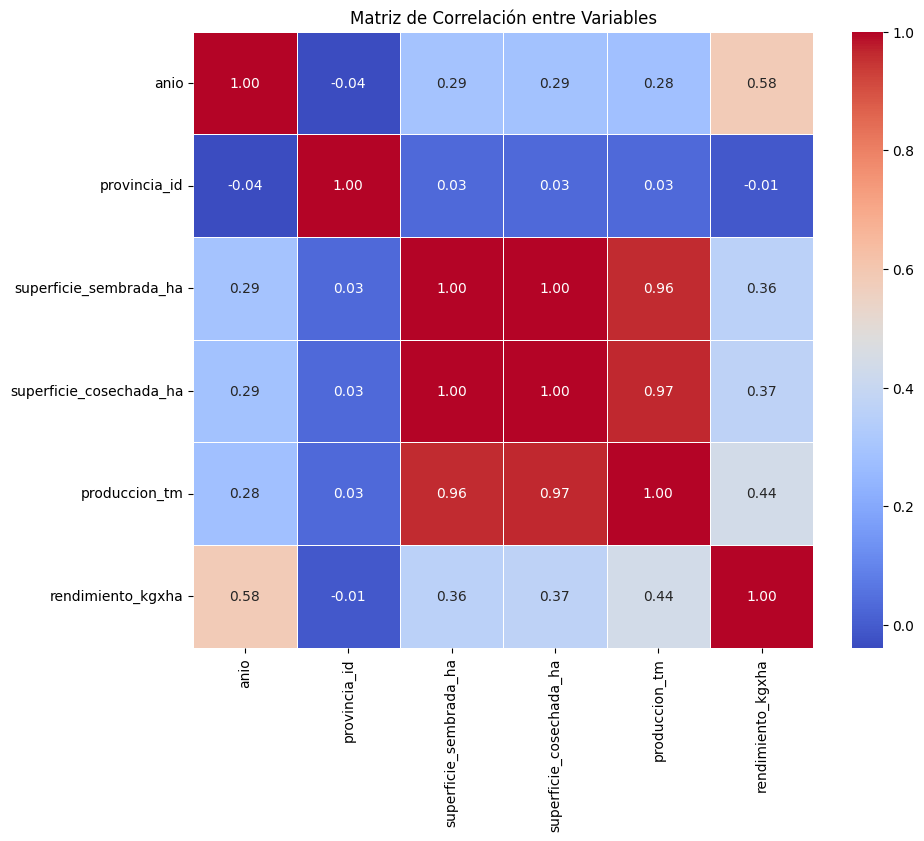

In [28]:
plt.figure(figsize=(10, 8))
cols_corr = ['anio', 'provincia_id', 'superficie_sembrada_ha',
             'superficie_cosechada_ha', 'produccion_tm', 'rendimiento_kgxha']
sns.heatmap(df_sin_outliers[cols_corr].corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()